The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) :
1 = the patient survived 5 years or longer
2 = the patient died within 5 year

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd


In [35]:
df=pd.read_csv("haberman.csv",names=['age','operation_year','axil_nodes','surv_status'])

In [36]:
df.head(1)
df.columns.values

array(['age', 'operation_year', 'axil_nodes', 'surv_status'], dtype=object)

In [37]:
df.describe()

,age,operation_year,axil_nodes,surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [22]:
surv_class=  lambda a: 1  if (a >=5) else 2
df.surv_status.map(surv_class)
print("completed")

completed


# Univariate Analysis of surv_class

In [38]:
df.surv_status.value_counts()

1    225
2     81
Name: surv_status, dtype: int64

# Bar plot

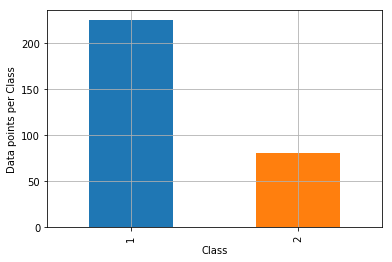

In [55]:
surv_status_dist=df.surv_status.value_counts().sort_index()
surv_status_dist.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.grid()
plt.show()

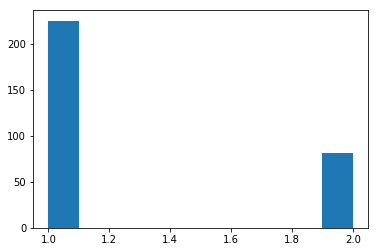

In [9]:
plt.hist(df['surv_status'])
plt.show()

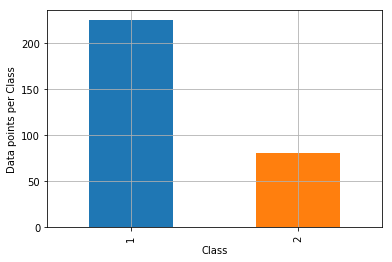

In [40]:
surv_status_dist=df.surv_status.value_counts().sort_index()
surv_status_dist.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.grid()
plt.show()

In [ ]:
# Univariate Analysis of Age

In [42]:
##Median , Percentile, Quantile
df_surv_1=df.loc[df.surv_status == 1]
df_surv_2=df.loc[df.surv_status == 2]
#mediance
print("meadian-surv_1:", np.median(df_surv_1['age']))
print("meadian-surv_2:",np.median(df_surv_2['age']))
#mean
print("mean-surv_1:", np.mean(df_surv_1['age']))
print("mean-surv_2:",np.mean(df_surv_2['age']))
#standard deviation
print("std-surv_1:",np.std(df_surv_1['age']))
print("std-surv_1:",np.std(df_surv_2['age']))
#percentile
print("90 percentile of status 1",np.percentile(df_surv_1['age'],90))
print("90 percentile of status 1",np.percentile(df_surv_2['age'],90))

meadian-surv_1: 52.0
meadian-surv_2: 53.0
mean-surv_1: 52.01777777777778
mean-surv_2: 53.67901234567901
std-surv_1: 10.987655475100508
std-surv_1: 10.104182193031312
90 percentile of status 1 67.0
90 percentile of status 1 67.0


[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


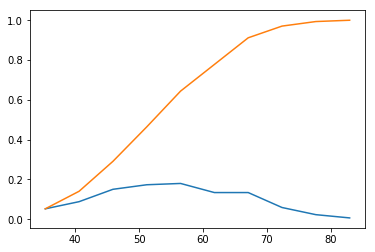

In [43]:
counts, bin_edges = np.histogram(df.age.values, bins=10, density = True)
                                 
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)




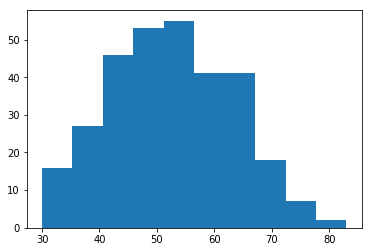

In [44]:
plt.hist(df.age)
plt.show()

C:\Users\admin\AppData\Local\Programs\Python\Python36\Lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\admin\AppData\Local\Programs\Python\Python36\Lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\admin\AppData\Local\Programs\Python\Python36\Lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


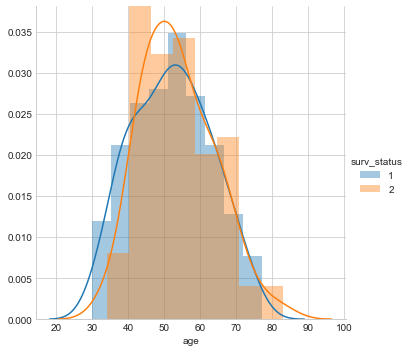

In [73]:
#sb.FacetGrid(df,hue='surv_status',size=5).map(sb.distplot,'age').add_legend()
sb.FacetGrid(df, hue="surv_status", size=5) \
   .map(sb.distplot, "age") \
   .add_legend();
plt.show();


# PDF & CDF according surivial status data

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


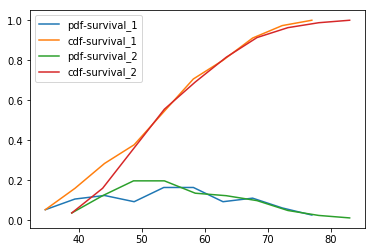

In [46]:
df_surv_1=df.loc[df.surv_status == 1]
df_surv_2=df.loc[df.surv_status == 2]

counts, bin_edges = np.histogram(df_surv_1.age.values, bins=10, density = True)
                               
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf-survival_1");
plt.plot(bin_edges[1:], cdf,label="cdf-survival_1")

counts, bin_edges = np.histogram(df_surv_2.age.values, bins=10, density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf-survival_2")
plt.plot(bin_edges[1:],cdf,label="cdf-survival_2")

plt.legend()
plt.show()

C:\Users\admin\AppData\Local\Programs\Python\Python36\Lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


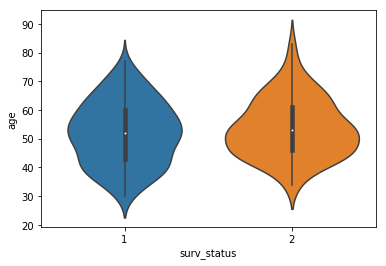

In [49]:
sb.violinplot(x=df.surv_status, y=df.age);


# univariate Analysis of axil_nodes

In [54]:
df.describe()

,age,operation_year,axil_nodes,surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [57]:
##Median , Percentile, Quantile
df_surv_1=df.loc[df.surv_status == 1]
df_surv_2=df.loc[df.surv_status == 2]
#mediance
print("meadian-surv_1:", np.median(df_surv_1['axil_nodes']))
print("meadian-surv_2:",np.median(df_surv_2['axil_nodes']))
#mean
print("mean-surv_1:", np.mean(df_surv_1['axil_nodes']))
print("mean-surv_2:",np.mean(df_surv_2['axil_nodes']))
#standard deviation
print("std-surv_1:",np.std(df_surv_1['axil_nodes']))
print("std-surv_1:",np.std(df_surv_2['axil_nodes']))
#percentile
print("90 percentile of status 1",np.percentile(df_surv_1['axil_nodes'],90))
print("90 percentile of status 1",np.percentile(df_surv_2['axil_nodes'],90))
from statsmodels import robust
print(robust.mad(df_surv_1['axil_nodes']))
print(robust.mad(df_surv_2['axil_nodes']))

meadian-surv_1: 0.0
meadian-surv_2: 4.0
mean-surv_1: 2.7911111111111113
mean-surv_2: 7.45679012345679
std-surv_1: 5.857258449412138
std-surv_1: 9.128776076761635
90 percentile of status 1 8.0
90 percentile of status 1 20.0
0.0
5.930408874022408


C:\Users\admin\AppData\Local\Programs\Python\Python36\Lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\admin\AppData\Local\Programs\Python\Python36\Lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\admin\AppData\Local\Programs\Python\Python36\Lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


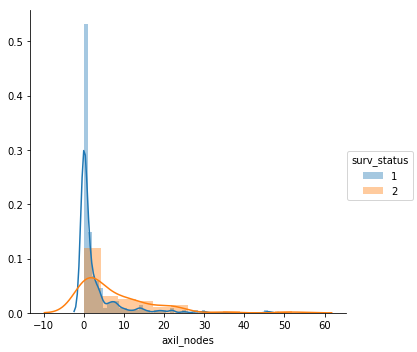

In [58]:
sb.FacetGrid(df,hue='surv_status',size=5).map(sb.distplot,'axil_nodes').add_legend()


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


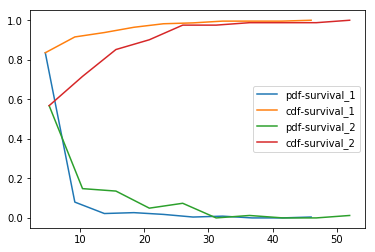

In [59]:
df_surv_1=df.loc[df.surv_status == 1]
df_surv_2=df.loc[df.surv_status == 2]

counts, bin_edges = np.histogram(df_surv_1.axil_nodes.values, bins=10, density = True)
                               
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf-survival_1");
plt.plot(bin_edges[1:], cdf,label="cdf-survival_1")

counts, bin_edges = np.histogram(df_surv_2.axil_nodes.values, bins=10, density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf-survival_2")
plt.plot(bin_edges[1:],cdf,label="cdf-survival_2")

plt.legend()
plt.show()

C:\Users\admin\AppData\Local\Programs\Python\Python36\Lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


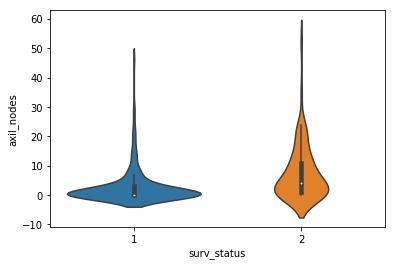

In [61]:
sb.violinplot(x='surv_status',y='axil_nodes',data=df,size=8)
plt.show()

# Bivariate Analysis

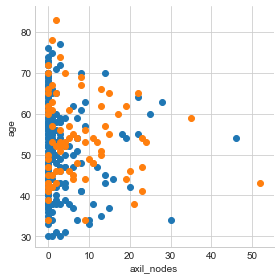

In [66]:
sb.set_style("whitegrid");
sb.FacetGrid(df,hue="surv_status",size=4).map(plt.scatter,'axil_nodes','age')

plt.show()

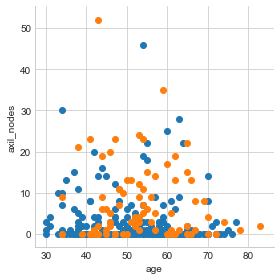

In [67]:
sb.set_style("whitegrid");
sb.FacetGrid(df,hue="surv_status",size=4).map(plt.scatter,'age','axil_nodes')

plt.show()

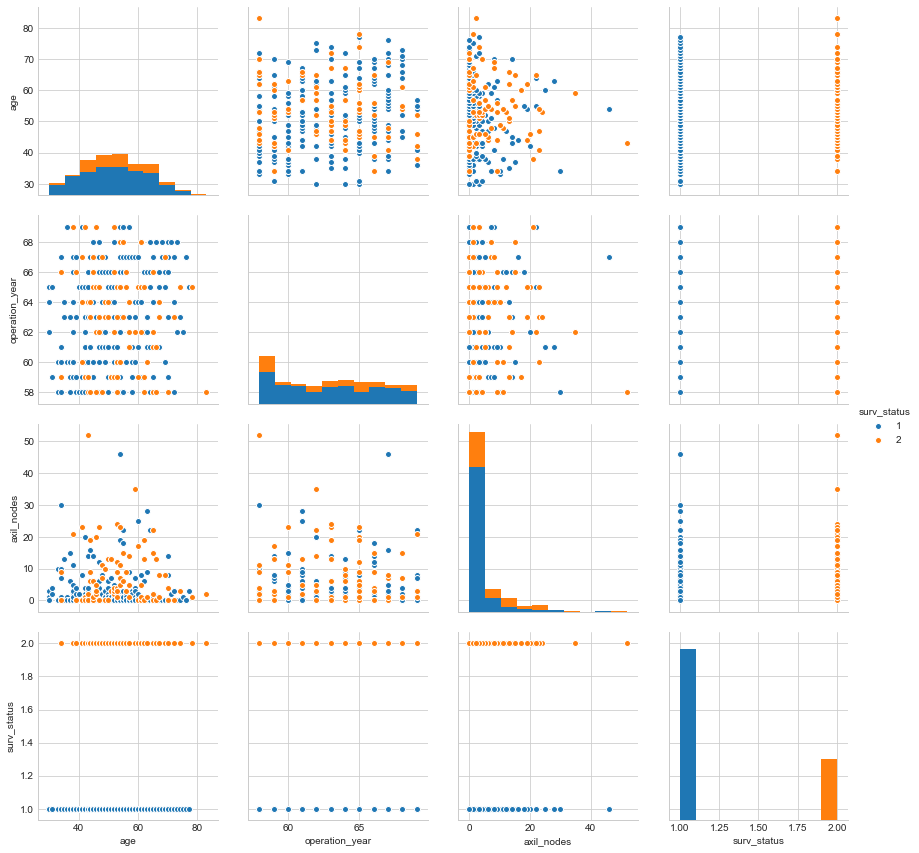

In [68]:
##pair plot
##diag_kind is kde, hist default hist
##kind scatter and reg
sb.set_style('whitegrid')
sb.pairplot(df,hue='surv_status',size=3,kind='scatter')
#sb.pairplot(df,hue='species',size=3,diag_kind="kde",kind='scatter')
plt.show()

In [63]:
df.columns.values

array(['age', 'operation_year', 'axil_nodes', 'surv_status'], dtype=object)

In [ ]:
#Multivariate plot

C:\Users\admin\AppData\Local\Programs\Python\Python36\Lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


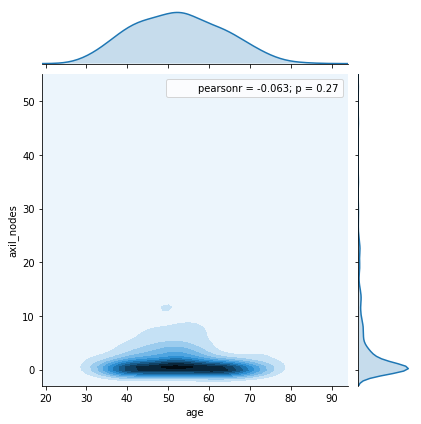

In [60]:
#2D density plot
sb.jointplot(x="age", y="axil_nodes", data=df, kind="kde");
plt.show()